# PROJEKT III: Airbnb Sentiment  Analysis

Data contais Airbnb overviews from New Orleans locations. It will be the first time I'll try to make a NLP Sentiment Analisys and WordCloud. The dataset consists of the costumers basics information, including ID, location name, description, location and some host data.

            key features: EDA, Data Visualization, NPL, WordClowd.

#### Objectives:
   * EDA
   * NLP
   * WordCloud
   
#### Steps:
   * Data Preparation
   * Data Analysis and Vizualization
   * NLP
   * WordClowd

In [1]:
#lib imports
import pandas as pd
import seaborn as sns
import numpy as np
import cufflinks as cf
import matplotlib.pyplot as plt

#plotly
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#NLTK & WordCloud
import nltk
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

%matplotlib inline

In [2]:
#load dataframe
df = pd.read_csv('data/new_orleans_airbnb_listings.csv')
#reviews = pd.read_csv('data/new_orleans_airbnb_reviews.csv', encoding='utf8')

In [3]:
df.head()

,id,name,description,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
0,19091,Fully Furnished Cozy Apartment,CITY OF NEW ORLEANS STR LICENSE PERMIT NUMBER:...,"NorthWest Carrollton, where this apartment is ...",72880,2010-01-23,"New Orleans, Louisiana, United States",within an hour,100%,100%,...,4.89,4.95,4.88,4.97,4.97,4.67,4.91,"17STR-08877, 20-OSTR-0105",t,5.07
1,26834,Maison Mandeville in the Marigny,Ideally-situated Marigny charmer<br /><br /><b...,NaN,114452,2010-04-27,"New Orleans, Louisiana, United States",within a day,100%,81%,...,4.96,4.95,4.97,5.00,4.98,4.93,4.90,"20STR-10811, 20-OSTR-00389",f,2.30
2,71624,Ravenwood Manor (Historic Bywater),You are in for a very unique stay in a neighbo...,"Ours is a neighborhood made up of artists, mus...",367223,2011-01-29,"New Orleans, Louisiana, United States",within an hour,100%,91%,...,4.94,4.91,4.96,4.97,4.98,4.80,4.90,"20RSTR-31027, 20-OSTR-31018",f,2.21
3,74498,Maison Marais 1: Large Local Living,Maison Marais 1 is a stylish one-bedroom apart...,"This is a vibrant, diverse neighborhood of mos...",391462,2011-02-14,"New Orleans, Louisiana, United States",within an hour,100%,95%,...,4.90,4.92,4.96,4.92,4.96,4.64,4.85,"Exempt: This listing is a licensed hotel, mote...",f,8.07
4,79536,FeelAtHomeInNO PrivateApt,Clean & Safe! Spacious private apartment conve...,"I love that it's down to earth, welcoming, his...",428362,2011-03-07,"New Orleans, Louisiana, United States",within an hour,100%,94%,...,4.86,4.92,4.94,4.98,4.97,4.43,4.85,"20RSTR-32056, 20-OSTR-00016",f,5.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           6028 non-null   int64  
 1   name                         6028 non-null   object 
 2   description                  6000 non-null   object 
 3   neighborhood_overview        4614 non-null   object 
 4   host_id                      6028 non-null   int64  
 5   host_since                   5990 non-null   object 
 6   host_location                5983 non-null   object 
 7   host_response_time           4449 non-null   object 
 8   host_response_rate           4449 non-null   object 
 9   host_acceptance_rate         4562 non-null   object 
 10  host_is_superhost            5990 non-null   object 
 11  host_listings_count          5990 non-null   float64
 12  host_verifications           6028 non-null   object 
 13  host_has_profile_p

In [5]:
df.describe()

,id,host_id,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,6.028000e+03,6.028000e+03,5990.000000,6028.000000,6028.000000,6028.000000,5725.000000,5906.000000,6028.000000,6028.000000,...,6028.000000,6028.000000,5356.000000,5341.000000,5343.000000,5341.000000,5342.000000,5341.000000,5341.000000,5356.000000
mean,3.096340e+07,1.261613e+08,46.634224,29.957344,-90.074508,4.890511,2.126288,2.825601,8.938288,635.523889,...,13.503650,1.157764,4.770147,4.831558,4.790548,4.893647,4.869369,4.770092,4.753503,3.215560
std,1.522782e+07,1.194316e+08,198.528224,0.022954,0.028415,2.914003,1.401288,2.181143,17.625508,504.190469,...,19.153095,1.750629,0.395421,0.299826,0.324464,0.250731,0.268262,0.322707,0.314243,7.813658
min,1.909100e+04,5.146000e+03,0.000000,29.899070,-90.137480,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,1.840335e+07,2.554932e+07,1.000000,29.940738,-90.089010,2.000000,1.000000,1.000000,1.000000,60.000000,...,0.000000,0.000000,4.710000,4.800000,4.730000,4.890000,4.850000,4.690000,4.690000,0.750000
50%,3.228621e+07,9.466656e+07,2.000000,29.956640,-90.073320,4.000000,2.000000,2.000000,2.000000,900.000000,...,6.000000,0.000000,4.860000,4.910000,4.880000,4.960000,4.950000,4.870000,4.830000,1.750000
75%,4.472240e+07,1.949531e+08,12.000000,29.969392,-90.063518,6.000000,3.000000,4.000000,3.000000,1125.000000,...,21.000000,2.000000,4.960000,4.980000,4.980000,5.000000,5.000000,4.970000,4.910000,3.322500
max,5.315408e+07,4.282765e+08,3186.000000,30.160150,-89.738090,16.000000,23.000000,30.000000,365.000000,5000.000000,...,359.000000,18.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,292.000000


Response:

* response rate
* response time

Aceptance:
* aceptance rate
* is superhost
* Host verified

Rooms:
* n bathrooms
* n bedrooms
* amenities

Availability:
* has_availability	
* availability_30	
* availability_60	
* availability_90	
* availability_365	

Reviews:
* review_scores_rating	
* review_scores_accuracy	
* review_scores_cleanliness	
* review_scores_checkin	
* review_scores_communication	
* review_scores_location	
* review_scores_value	 

## Data Preparation

In [6]:
#remove unecessary columns
df.drop(['description','neighborhood_overview','first_review','last_review',
         'host_verifications','host_listings_count','host_has_profile_pic','license',
         'host_neighbourhood','instant_bookable','minimum_nights', 'maximum_nights'], axis = 1, inplace = True)


In [7]:
#remove NaNs on bed ad bathrooms
df.dropna(subset = ['bedrooms','beds','bathrooms_text','host_identity_verified'], inplace = True)

#transform to_datetime
df['host_since'] = pd.to_datetime(df['host_since'], format = '%Y/%m/%d', dayfirst = True)

#change bathrooms column name and values
df.rename(columns = {'bathrooms_text':'bathrooms'},inplace = True)
df['bathrooms'] = df['bathrooms'].str.split(' ').str[0]
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce', downcast = 'integer')
df['bathrooms'] = df['bathrooms'].round(0)

#transform bool values
change_bool = ['host_is_superhost','host_identity_verified','has_availability']
for i in change_bool:
    df[i].replace({'t': True, 'f': False}, inplace = True)

#transform percentege values
change_per = ['host_response_rate','host_acceptance_rate']
for i in change_per:
    df[i] = df[i].str.split('%').str[0]
    df[i] = pd.to_numeric(df[i], errors='ignore')
    df[i]  = df[i]/20

In [8]:
df.head()

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,19091,Fully Furnished Cozy Apartment,72880,2010-01-23,"New Orleans, Louisiana, United States",within an hour,5.0,5.00,True,True,...,7,4,4.89,4.95,4.88,4.97,4.97,4.67,4.91,5.07
1,26834,Maison Mandeville in the Marigny,114452,2010-04-27,"New Orleans, Louisiana, United States",within a day,5.0,4.05,True,True,...,7,0,4.96,4.95,4.97,5.00,4.98,4.93,4.90,2.30
2,71624,Ravenwood Manor (Historic Bywater),367223,2011-01-29,"New Orleans, Louisiana, United States",within an hour,5.0,4.55,True,False,...,16,2,4.94,4.91,4.96,4.97,4.98,4.80,4.90,2.21
3,74498,Maison Marais 1: Large Local Living,391462,2011-02-14,"New Orleans, Louisiana, United States",within an hour,5.0,4.75,True,True,...,19,1,4.90,4.92,4.96,4.92,4.96,4.64,4.85,8.07
4,79536,FeelAtHomeInNO PrivateApt,428362,2011-03-07,"New Orleans, Louisiana, United States",within an hour,5.0,4.70,True,False,...,17,3,4.86,4.92,4.94,4.98,4.97,4.43,4.85,5.00


Text(0.5, 1.0, 'Before')

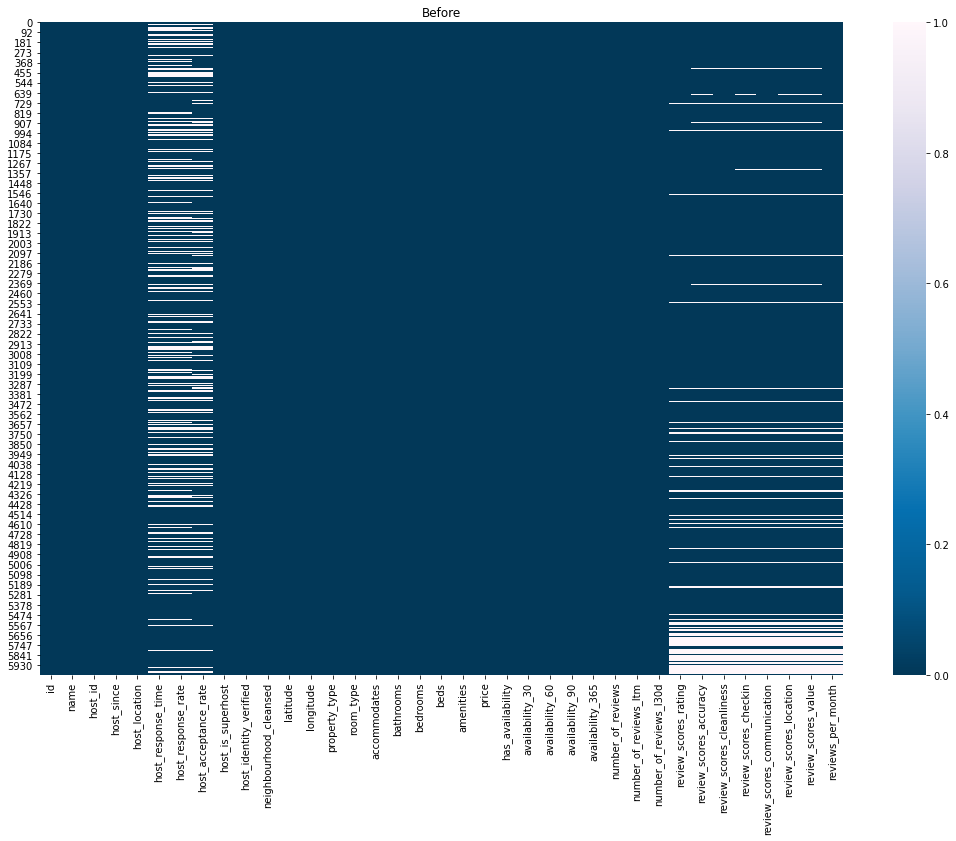

In [9]:
fix, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(data = df.isnull(), cmap="PuBu_r").set_title('Before')

## Exploratory Data Analysis

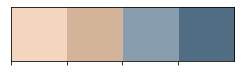

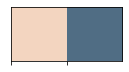

In [10]:
#set colors
colors_cfc = ['#F3D5C0', '#D4B499', '#889EAF', '#506D84']
colors_cfc2 = ['#F3D5C0', '#506D84']

sns.palplot(colors_cfc)
sns.palplot(colors_cfc2)

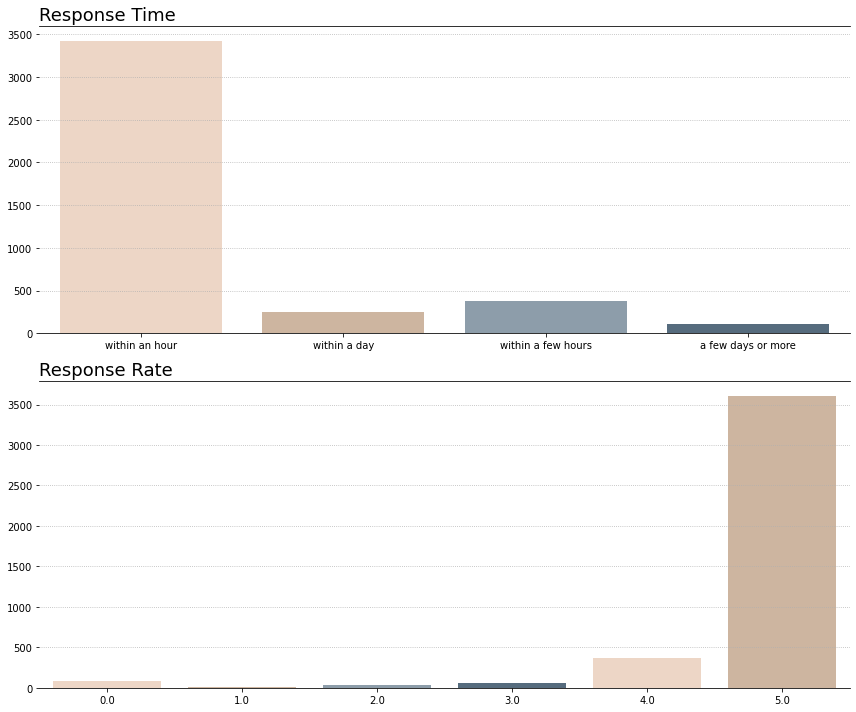

In [11]:
#create ds for response rate
ds_res = df['host_response_rate'].round(0)

#create plot
fig, (ax1,ax2) = plt.subplots(2,1, figsize = [12,10])

axes = [ax1, ax2]
sns.countplot(data = df, x = 'host_response_time', palette = colors_cfc, ax = ax1).set_title('Response Time', fontsize = 18, loc = 'left')
sns.countplot(x = ds_res, palette = colors_cfc, ax = ax2).set_title('Response Rate', fontsize = 18, loc = 'left')

for i in axes:
    i.set_ylabel('')
    i.set_xlabel('')
    i.grid(axis = 'y',linestyle = 'dotted')
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)

fig.tight_layout()

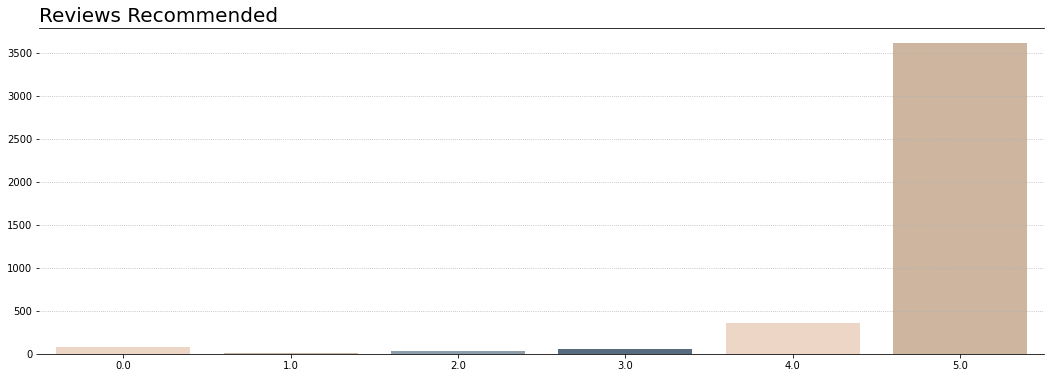

In [12]:
ds_acc = df['host_response_rate'].round(0)

fig, ax = plt.subplots(figsize = [18,6])
sns.countplot(x= ds_acc, palette = colors_cfc).set_title('Reviews Recommended', fontsize = 20, loc = 'left')
ax.set_ylabel('')
ax.set_xlabel('')
ax.grid(axis = 'y',linestyle = 'dotted')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

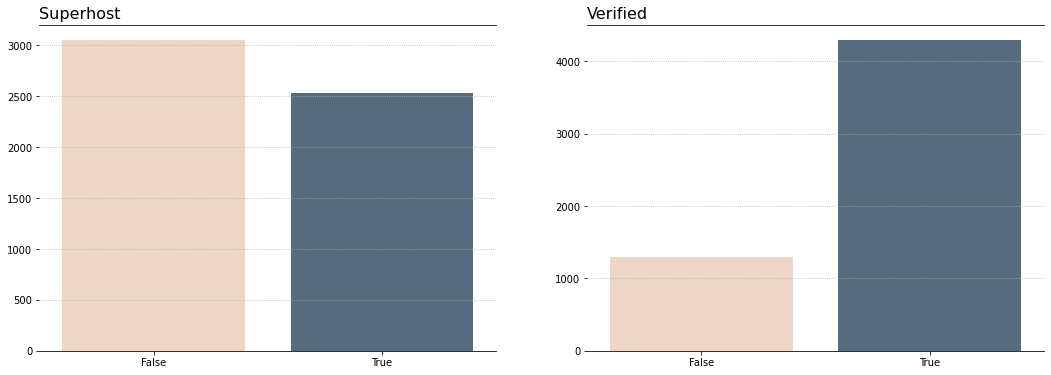

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = [18,6])

axes = [ax1, ax2]

sns.countplot(data = df, x = 'host_is_superhost', palette = colors_cfc2, ax = ax1).set_title('Superhost', fontsize = 16, loc = 'left')
sns.countplot(data = df, x = 'host_identity_verified', palette = colors_cfc2, ax = ax2).set_title('Verified', fontsize = 16, loc = 'left')

for i in axes:
    i.set_ylabel('')
    i.set_xlabel('')
    i.grid(axis = 'y',linestyle = 'dotted')
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)

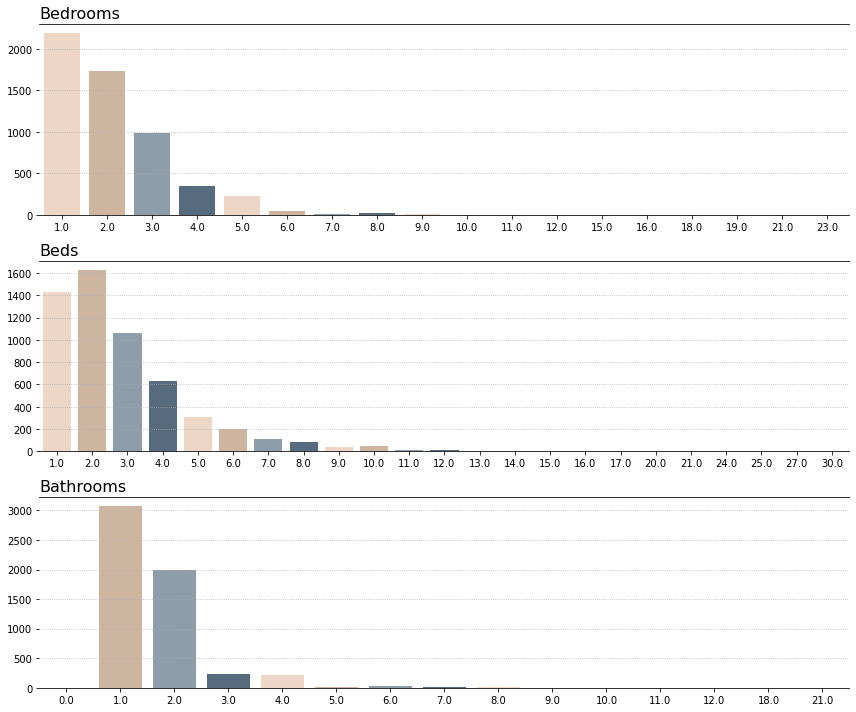

In [14]:
fig , (ax1 , ax2, ax3) = plt.subplots(3,1, figsize=(12 , 10))

axes = [ax1, ax2, ax3]

sns.countplot(data = df, x = 'bedrooms', palette = colors_cfc, ax = ax1).set_title('Bedrooms', fontsize = 16, loc = 'left')
sns.countplot(data = df, x = 'beds', palette = colors_cfc, ax = ax2).set_title('Beds', fontsize = 16, loc = 'left')
sns.countplot(data = df, x = 'bathrooms', palette = colors_cfc, ax = ax3).set_title('Bathrooms', fontsize = 16, loc = 'left')

for i in axes:
    i.set_ylabel('')
    i.set_xlabel('')
    i.grid(axis = 'y',linestyle = 'dotted')
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)

fig.tight_layout()

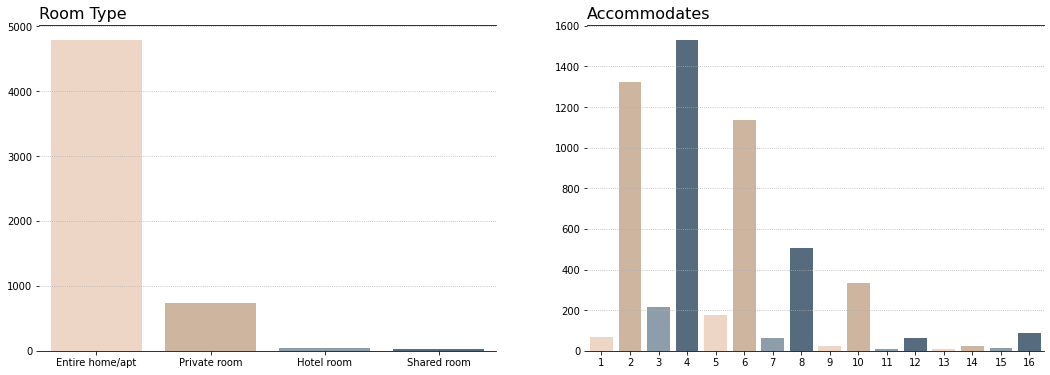

In [15]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = [18,6])

axes = [ax1, ax2]

sns.countplot(data = df, x = 'room_type', palette = colors_cfc, ax = ax1).set_title('Room Type', fontsize = 16, loc = 'left')
sns.countplot(data = df, x = 'accommodates', palette = colors_cfc, ax = ax2).set_title('Accommodates', fontsize = 16, loc = 'left')

for i in axes:
    i.set_ylabel('')
    i.set_xlabel('')
    i.grid(axis = 'y',linestyle = 'dotted')
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)

In [17]:
#create ds's
ds_rat = df['review_scores_rating'].round(0)
ds_acc = df['review_scores_accuracy'].round(0)
ds_val = df['review_scores_value'].round(0)

ds_clean = df['review_scores_cleanliness'].round(0)
ds_check = df['review_scores_checkin'].round(0)
ds_com = df['review_scores_communication'].round(0)
ds_loc = df['review_scores_location'].round(0)

ds_rev = df['number_of_reviews'].round(0)
ds_ltm = df['number_of_reviews_ltm'].round(0)
ds_130 = df['number_of_reviews_l30d'].round(0)

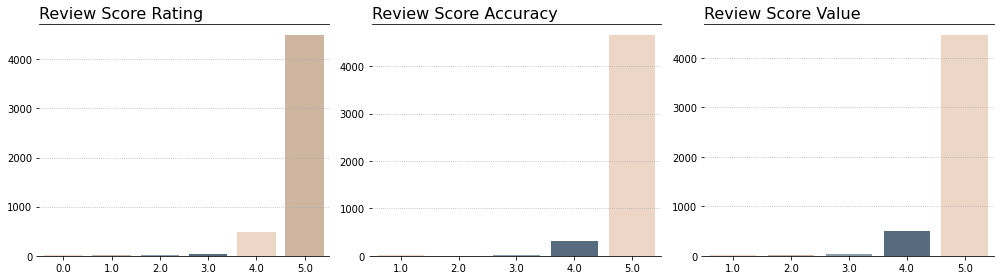

In [18]:
fig , (ax1 , ax2, ax3) = plt.subplots(1,3, figsize=(14 , 4))

axes = [ax1, ax2, ax3]

sns.countplot(x = ds_rat, palette = colors_cfc, ax = ax1).set_title('Review Score Rating', fontsize = 16, loc = 'left')
sns.countplot(x = ds_acc, palette = colors_cfc, ax = ax2).set_title('Review Score Accuracy', fontsize = 16, loc = 'left')
sns.countplot(x = ds_val, palette = colors_cfc, ax = ax3).set_title('Review Score Value', fontsize = 16, loc = 'left')

for i in axes:
    i.set_ylabel('')
    i.set_xlabel('')
    i.grid(axis = 'y',linestyle = 'dotted')
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)

fig.tight_layout()

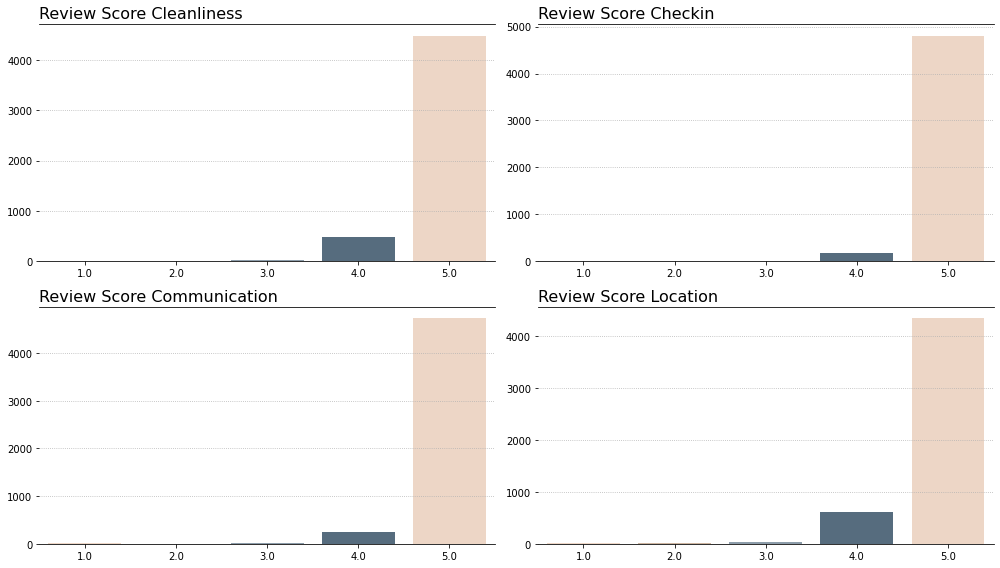

In [19]:
fig , ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2, figsize=(14 , 8))

axes = [ax1, ax2, ax3, ax4]

sns.countplot(x = ds_clean, palette = colors_cfc, ax = ax1).set_title('Review Score Cleanliness', fontsize = 16, loc = 'left')
sns.countplot(x = ds_check, palette = colors_cfc, ax = ax2).set_title('Review Score Checkin', fontsize = 16, loc = 'left')
sns.countplot(x = ds_com, palette = colors_cfc, ax = ax3).set_title('Review Score Communication', fontsize = 16, loc = 'left')
sns.countplot(x = ds_loc, palette = colors_cfc, ax = ax4).set_title('Review Score Location', fontsize = 16, loc = 'left')

for i in axes:
    i.set_ylabel('')
    i.set_xlabel('')
    i.grid(axis = 'y',linestyle = 'dotted')
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)

fig.tight_layout()

In [20]:
# fig , (ax1 , ax2, ax3) = plt.subplots(1,3, figsize=(14 , 4))

axes = [ax1, ax2, ax3]

sns.scatterplot(x = ds_rev, palette = colors_cfc, ax = ax1).set_title('number_of_reviews', fontsize = 16, loc = 'left')
sns.countplot(x = ds_ltm, palette = colors_cfc, ax = ax2).set_title('number_of_reviews_ltm', fontsize = 16, loc = 'left')
sns.countplot(x = ds_130, palette = colors_cfc, ax = ax3).set_title('number_of_reviews_l30d', fontsize = 16, loc = 'left')

for i in axes:
    i.set_ylabel('')
    i.set_xlabel('')
    i.grid(axis = 'y',linestyle = 'dotted')
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)

fig.tight_layout()

In [21]:
df.head()

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,19091,Fully Furnished Cozy Apartment,72880,2010-01-23,"New Orleans, Louisiana, United States",within an hour,5.0,5.00,True,True,...,7,4,4.89,4.95,4.88,4.97,4.97,4.67,4.91,5.07
1,26834,Maison Mandeville in the Marigny,114452,2010-04-27,"New Orleans, Louisiana, United States",within a day,5.0,4.05,True,True,...,7,0,4.96,4.95,4.97,5.00,4.98,4.93,4.90,2.30
2,71624,Ravenwood Manor (Historic Bywater),367223,2011-01-29,"New Orleans, Louisiana, United States",within an hour,5.0,4.55,True,False,...,16,2,4.94,4.91,4.96,4.97,4.98,4.80,4.90,2.21
3,74498,Maison Marais 1: Large Local Living,391462,2011-02-14,"New Orleans, Louisiana, United States",within an hour,5.0,4.75,True,True,...,19,1,4.90,4.92,4.96,4.92,4.96,4.64,4.85,8.07
4,79536,FeelAtHomeInNO PrivateApt,428362,2011-03-07,"New Orleans, Louisiana, United States",within an hour,5.0,4.70,True,False,...,17,3,4.86,4.92,4.94,4.98,4.97,4.43,4.85,5.00


## Sentiment Analysis

In [22]:
reviews.head()

,listing_id,id,date,reviewer_id,comments
0,19091,35930,2010-04-16,97343,John was extremely accommodating to our schedu...
1,19091,45900,2010-05-24,99114,John was a great host and made sure that I cou...
2,19091,61668,2010-07-06,128406,My husband and I stayed with John last month a...
3,19091,96538,2010-09-13,228880,John is a great host for your time in New Orle...
4,19091,108793,2010-09-30,214223,john is a fantastic host. the place is perfe...


In [23]:
#working TextBlob
blob = TextBlob(reviews['comments'][1])
print('Sentence: ', blob.sentences, '\n\n', 'Polarity: ',blob.sentiment[0], '\n', 'Subjectivity: ',blob.sentiment[1])

Sentence:  [Sentence("John was a great host and made sure that I could check in when I needed to and that any questions I had could be easily answered."), Sentence("The unit is in a lovely craftsman style home in a quite neighborhood."), Sentence("The unit is very spacious and full of light and wood."), Sentence("It would make a great launch pad for a couple looking to stay for a week or more due to the size and kitchen / breakfast nook."), Sentence("Would stay with him again anytime.")] 

 Polarity:  0.43583333333333335 
 Subjectivity:  0.6397222222222222


In [24]:
#make a test ds to test usability
test_ds = reviews[0:99]
test_ds

,listing_id,id,date,reviewer_id,comments
0,19091,35930,2010-04-16,97343,John was extremely accommodating to our schedu...
1,19091,45900,2010-05-24,99114,John was a great host and made sure that I cou...
2,19091,61668,2010-07-06,128406,My husband and I stayed with John last month a...
3,19091,96538,2010-09-13,228880,John is a great host for your time in New Orle...
4,19091,108793,2010-09-30,214223,john is a fantastic host. the place is perfe...
...,...,...,...,...,...
94,19091,3373622,2013-01-19,4577925,"John's a welcoming host, and the apartment is ..."
95,19091,3390932,2013-01-22,1834451,My husband and I inadvertently booked our trip...
96,19091,3419780,2013-01-27,4262607,"John was incredibly welcoming and responsive, ..."
97,19091,3457892,2013-02-02,973291,This was our second visit in John's apartment....


In [25]:
ds_wc = reviews

In [26]:
pol = lambda x: TextBlob(str(x)).sentiment[0]
sub = lambda x: TextBlob(str(x)).sentiment[1]

ds_wc['Polarity'] = ds_wc['comments'].apply(pol)
ds_wc['Subjectivity'] = ds_wc['comments'].apply(sub)

In [27]:
#get lists
positive_list = []
negative_list = []

for i in ds_wc['comments']:
    blob = TextBlob(str(i)).words
    for words in blob:
        if TextBlob(str(words)).sentiment[0] > 0.3:
            singular = words.singularize()
            positive_list.append(singular)
        elif TextBlob(str(words)).sentiment[0] < -0.3:
            singular = words.singularize()
            negative_list.append(singular)

Text(0.5, 1.0, 'Comments Polarity')

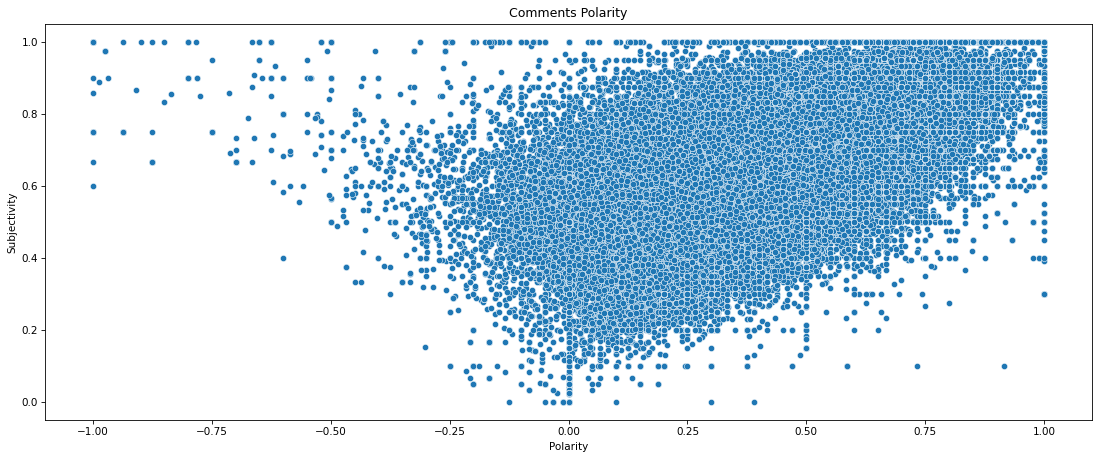

In [28]:
#plot
fig, ax = plt.subplots(figsize=(18, 7), dpi=75)
sns.scatterplot(data = ds_wc, x = "Polarity", y = "Subjectivity", palette = 'RdYlGn')
ax.set_title('Comments Polarity')

In [29]:
#create WordClouds
positive_wc = WordCloud(width = 1500, height = 1000, background_color="white", collocations = False).generate(str(positive_list)) 
negative_wc = WordCloud(width = 1500, height = 1000, background_color="white", collocations = False).generate(str(negative_list)) 

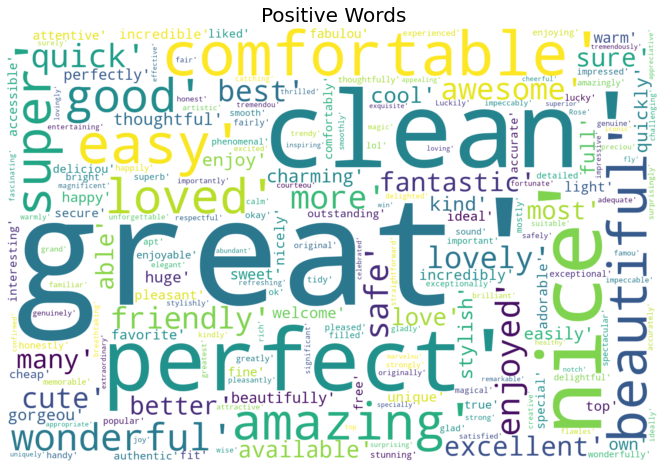

In [30]:
plt.figure(figsize=(12, 8))
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Positive Words', fontsize=20)
plt.axis("off")
plt.show()

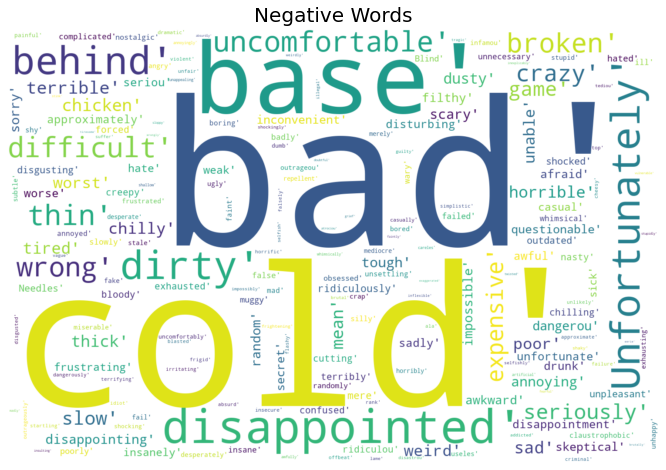

In [31]:
plt.figure(figsize=(12, 8))
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Negative Words', fontsize=20)
plt.axis("off")
plt.show()